In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import gc
from sklearn.model_selection import train_test_split

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
class Flags():
    export=False
    out_path = 'assets/'
    reduce = 0.02
    calc_normalization = True
flags = Flags()

In [3]:
raw = pd.read_csv (flags.out_path + 'dataset_original.csv', header=0, decimal=',')

In [4]:
y = raw['% Silica Concentrate']
X = raw.drop(['% Silica Concentrate', 'date'], axis=1)

In [5]:
# Normalization (mean 0 and std 1)
# memory: 708 - 481 = mB
# Time: 0.43 s
if flags.calc_normalization:
    time0 = time()
    normalized = (X-X.mean())/(X.std())
    time1 = time()
    print("%.2f s" % (time1 - time0))
    if flags.export: normalized.to_csv(flags.out_path + "dataset_normalized.csv")
else:
    normalized = pd.read_csv(flags.out_path + "dataset_normalized.csv")

3.85 s


In [6]:
_, X_reduced, _, y_reduced = train_test_split(normalized, y, test_size=flags.reduce, random_state=100)

# PCA

0.27 s


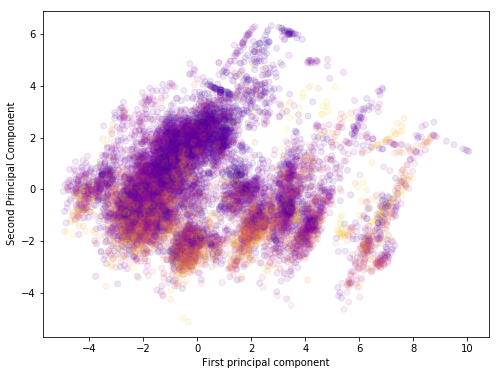

In [7]:
# Time:
#   700: 0.02 s
#   7k: 0.04 s
#   70k: 0.29 s
#   700k: 

from sklearn.decomposition import PCA
time0 = time()
pca = PCA(n_components=2)
pca.fit(X_reduced)
X_pca = pca.transform(X_reduced)
time1 = time()
print("%.2f s" % (time1 - time0))

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_reduced,cmap='plasma', alpha=0.1)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
if flags.export: 
    pd.DataFrame(X_pca).to_csv(flags.out_path + "dataset_pca.csv")
    plt.savefig(flags.out_path+'graph_pca.svg')

# t-SNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 14750 samples in 0.098s...
[t-SNE] Computed neighbors for 14750 samples in 6.959s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14750
[t-SNE] Computed conditional probabilities for sample 2000 / 14750
[t-SNE] Computed conditional probabilities for sample 3000 / 14750
[t-SNE] Computed conditional probabilities for sample 4000 / 14750
[t-SNE] Computed conditional probabilities for sample 5000 / 14750
[t-SNE] Computed conditional probabilities for sample 6000 / 14750
[t-SNE] Computed conditional probabilities for sample 7000 / 14750
[t-SNE] Computed conditional probabilities for sample 8000 / 14750
[t-SNE] Computed conditional probabilities for sample 9000 / 14750
[t-SNE] Computed conditional probabilities for sample 10000 / 14750
[t-SNE] Computed conditional probabilities for sample 11000 / 14750
[t-SNE] Computed conditional probabilities for sample 12000 / 14750
[t-SNE] Computed conditional probabilities for sam

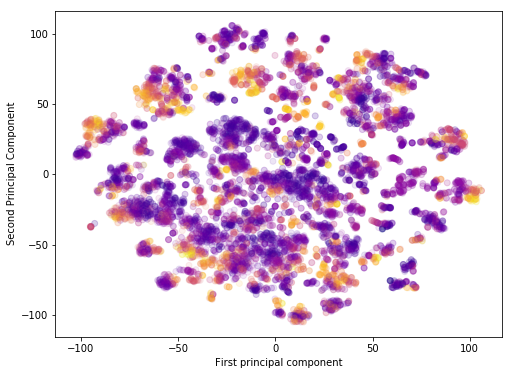

In [8]:
# Time: 
#    700: 2.97 s
#    7k: 36.22 s
#    70k: 756.18 s
#    350k: 6hs?
#    700K: 21HS/????

from sklearn.manifold import TSNE
time0 = time()
tsne = TSNE(n_components=2, early_exaggeration=30, verbose=1, learning_rate=400)
X_tsne = tsne.fit_transform(X_reduced)
time1 = time()
print("%.2f s" % (time1 - time0))


plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y_reduced,cmap='plasma', alpha=0.1)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
if flags.export: 
    pd.DataFrame(X_pca).to_csv(flags.out_path + "dataset_tsne.csv")
    plt.savefig(flags.out_path+'graph_tsne.svg')